In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Pokemon.csv') # csv beolvasása

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [7]:
df.median(numeric_only=True)

#             364.5
Total         450.0
HP             65.0
Attack         75.0
Defense        70.0
Sp. Atk        65.0
Sp. Def        70.0
Speed          65.0
Generation      3.0
Legendary       0.0
dtype: float64

In [8]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Adjuk meg azokat a pokemonokat, amelyek a második generációba tartoznak és defense értékük legalább kétszerese az attacknak!

In [4]:
df[(df['Generation'] == 2) & (df['Attack'] >= df['Defense'] * 2)].head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
186,172,Pichu,Electric,NaN,205,20,40,15,35,35,60,2,False
188,174,Igglybuff,Normal,Fairy,210,90,30,15,40,20,15,2,False
213,198,Murkrow,Dark,Flying,405,60,85,42,85,42,91,2,False
246,228,Houndour,Dark,Fire,330,45,60,30,80,50,65,2,False
257,238,Smoochum,Ice,Psychic,305,45,30,15,85,65,65,2,False


Adjuk meg azokat a pokemonokat akiknek sebessége átlagon felüli.

In [5]:
avg_speed = df['Speed'].mean()

df[df['Speed'] > avg_speed]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [6]:
df.drop(columns='#', inplace=True) # columns: eldobandó oszlopok tömbje, inplace: ne új dataframe adódjon vissza
df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Csoportosítás

In [7]:
df[['Generation', 'Legendary', 'Attack', 'Defense']].groupby(by=['Generation', 'Legendary']).mean()

Attack     Defense
Generation Legendary                        
1          False       74.981250   70.175000
           True       120.833333   89.166667
2          False       70.693069   72.118812
           True        99.000000   99.000000
3          False       76.971831   69.901408
           True       118.333333  107.222222
4          False       79.620370   75.074074
           True       109.846154  103.538462
5          False       78.246667   70.486667
           True       120.266667   90.733333
6          False       70.459459   74.013514
           True       125.250000  101.375000

## Vizualizáció

Áttekinthetőség miatt fontos ábrákat készíteni. Ezt általában a matplotlib segítségével, fogjuk megtenni. De a pandasnak is vannak beépített grafikonjai.

<Axes: xlabel='Defense', ylabel='Speed'>

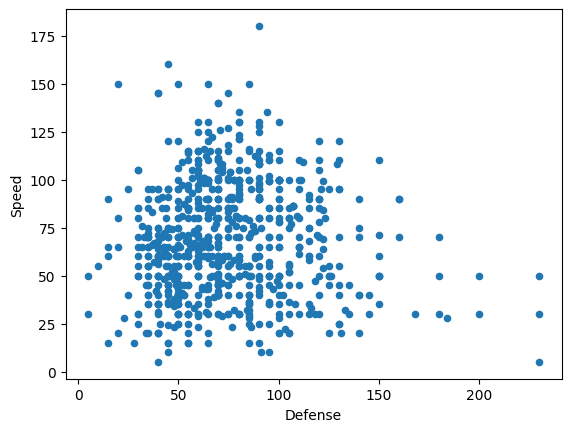

In [8]:
df.plot.scatter(x='Defense', y='Speed')

<Axes: ylabel='Frequency'>

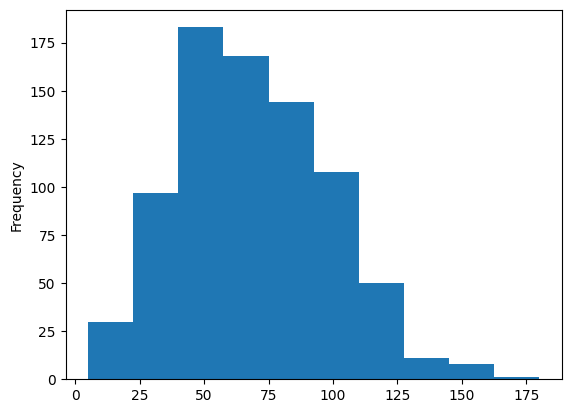

In [9]:
df['Speed'].plot.hist() # eloszlás általában haranggörbe

Generation
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
5    Axes(0.125,0.11;0.775x0.77)
6    Axes(0.125,0.11;0.775x0.77)
dtype: object

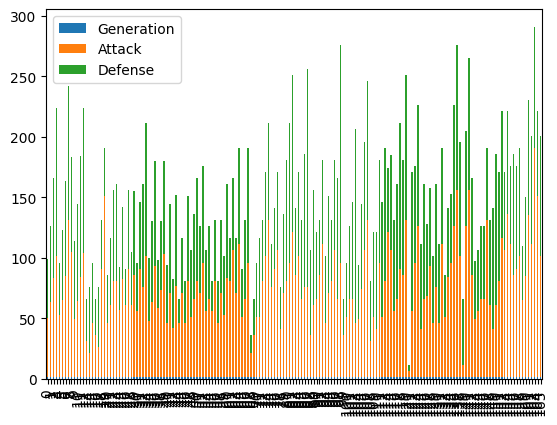

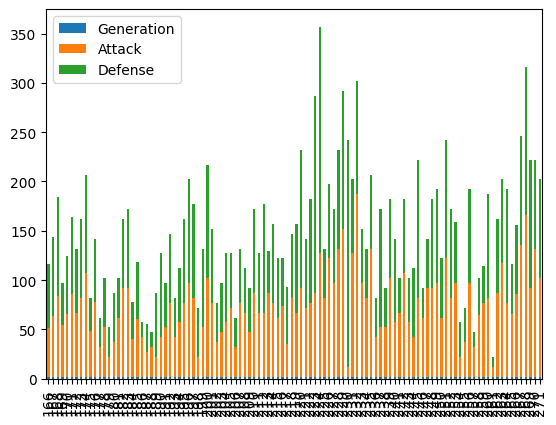

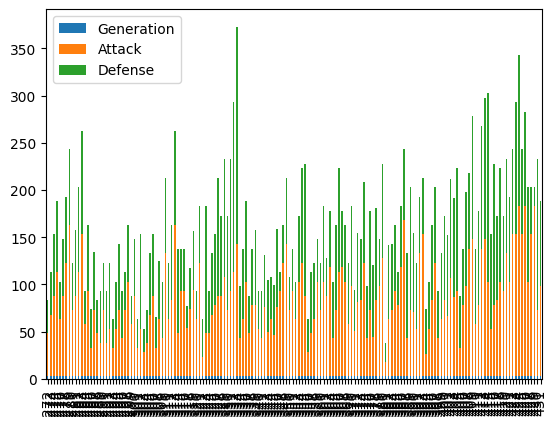

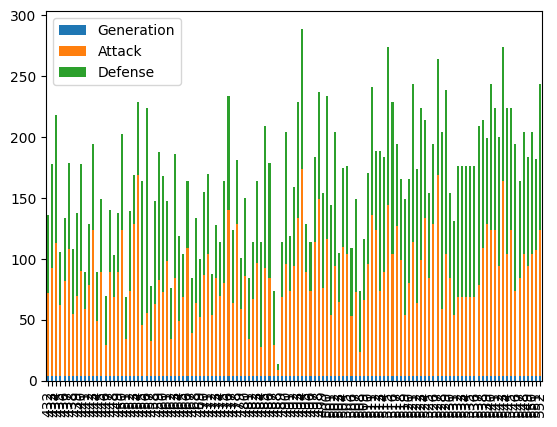

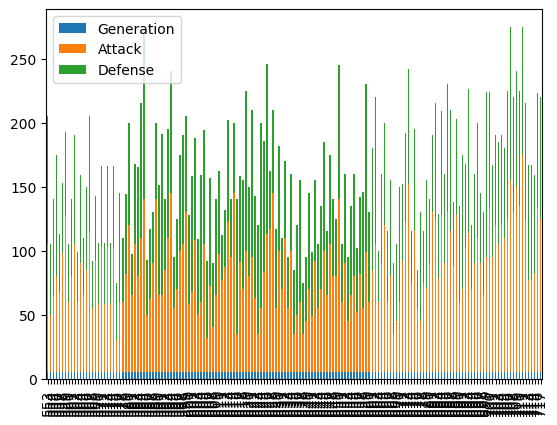

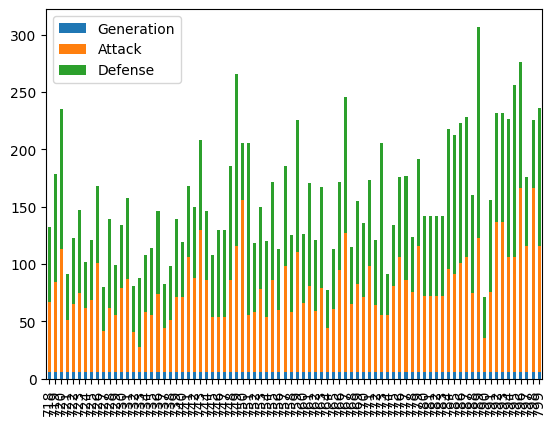

In [10]:
data = df[['Generation', 'Attack', 'Defense']].groupby(by=['Generation'])
data.plot.bar(stacked=True)

Generation
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
5    Axes(0.125,0.11;0.775x0.77)
6    Axes(0.125,0.11;0.775x0.77)
dtype: object

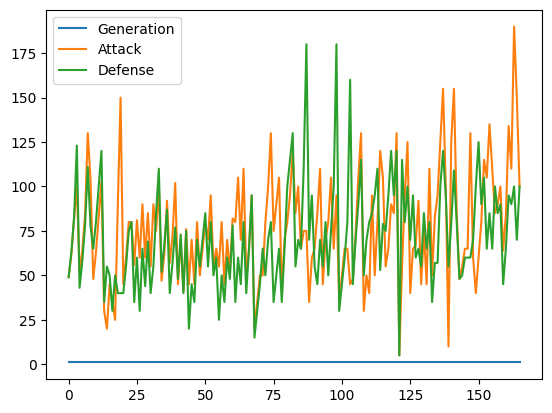

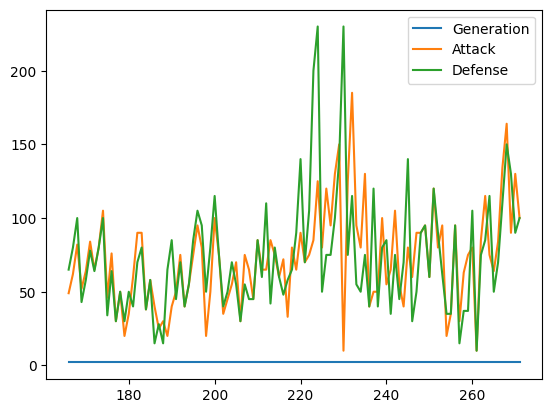

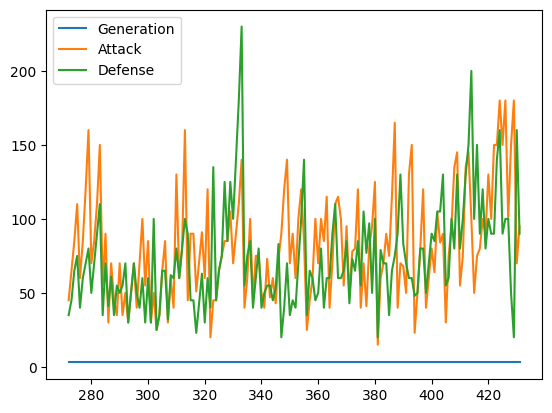

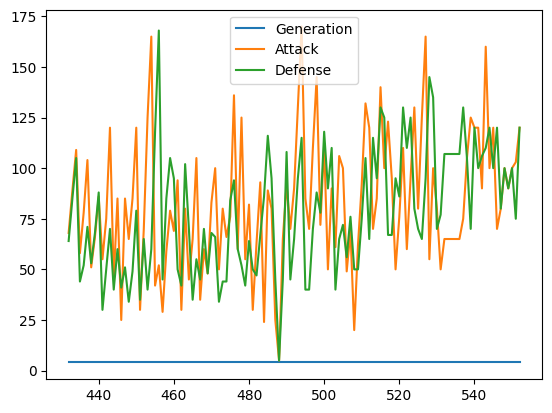

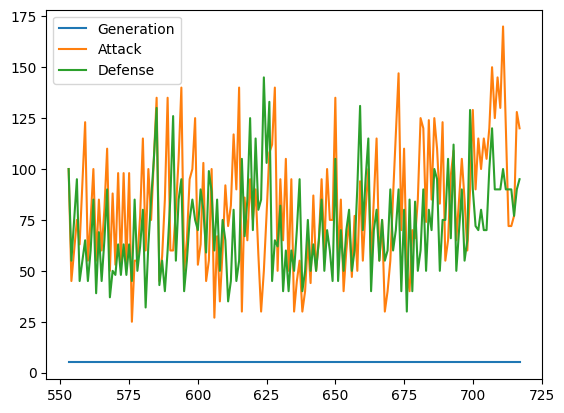

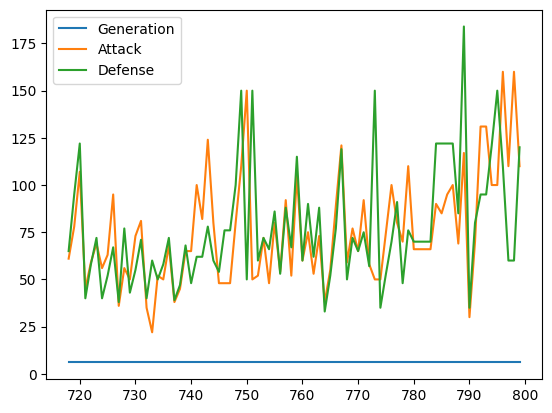

In [11]:
data.plot.line()

In [18]:
plt.figure(figSize=(10, 8))

AttributeError: Figure.set() got an unexpected keyword argument 'figSize'

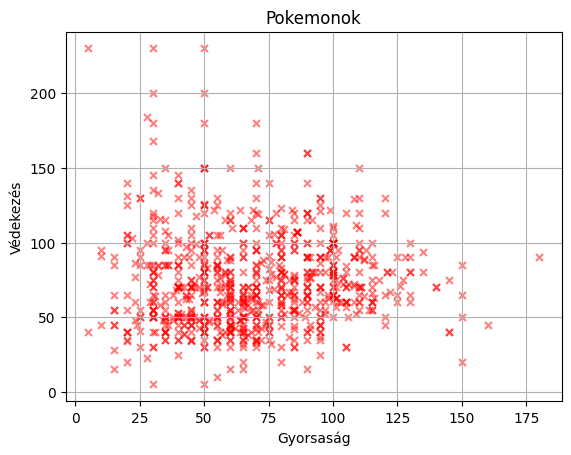

In [20]:
plt.scatter(df['Speed'], df['Defense'], s=25, c='red', marker='x', alpha=0.5)
plt.xlabel('Gyorsaság')
plt.ylabel('Védekezés')
plt.title('Pokemonok')
plt.grid()
plt.show()

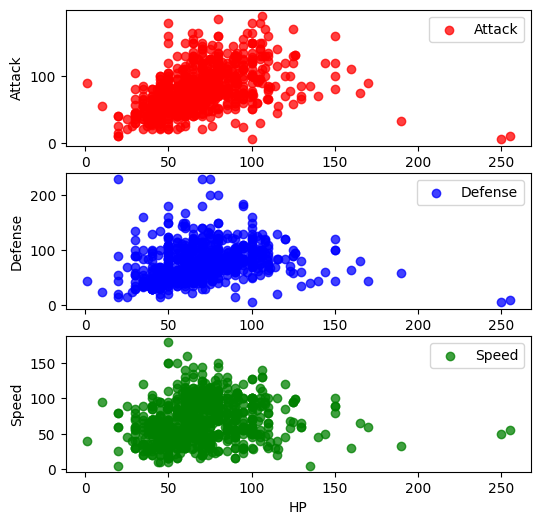

In [24]:
colors = ['red', 'blue', 'green']

features = ['Attack', 'Defense', 'Speed']

fig, ax = plt.subplots(3, 1, figsize=(6,6))

for i in range(3):
    ax[i].scatter(df['HP'], df[features[i]], c=colors[i], alpha=0.75, label=features[i])
    ax[i].set_xlabel('HP')
    ax[i].set_ylabel(features[i])
    ax[i].legend()

Adjuk meg, hogy milyen típusú pokemonok rendelkeznek átlagosan a legnagyobb attack értékkel. Jelenítsük meg az így kapott információt.

In [37]:
gdata = df[['Type 1', 'Attack']].groupby(by=['Type 1']).mean()

